# Credit Card Campaign Analysis Project

# 

In [1]:
## First importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 

In [3]:
## Loading csv files into pandas dataframe

In [4]:
credit_card_data=pd.read_csv(r"C:\Users\RITESH0503\Downloads\credit_card_datasets\credit_card.csv")

In [5]:
customer_data=pd.read_csv(r"C:\Users\RITESH0503\Downloads\credit_card_datasets\customer.csv")

# 

In [6]:
## Understanding the data                

In [7]:
credit_card_data.head(2)

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0


In [8]:
customer_data.head(2)

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2


# 

In [9]:
## Combining both the dataframe into single dataframe for further analysis

In [10]:
data=pd.concat([customer_data,credit_card_data],axis=1,join="inner")

In [11]:
data.head(2)

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,...,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,...,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,...,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0


# 

In [12]:
## Checking the data types of the fields and converting into appropritate data types

In [13]:
data.dtypes

Client_Num                   int64
Customer_Age                 int64
Gender                      object
Dependent_Count              int64
Education_Level             object
Marital_Status              object
state_cd                    object
Zipcode                      int64
Car_Owner                   object
House_Owner                 object
Personal_loan               object
contact                     object
Customer_Job                object
Income                       int64
Cust_Satisfaction_Score      int64
Client_Num                   int64
Card_Category               object
Annual_Fees                  int64
Activation_30_Days           int64
Customer_Acq_Cost            int64
Week_Start_Date             object
Week_Num                    object
Qtr                         object
current_year                 int64
Credit_Limit               float64
Total_Revolving_Bal          int64
Total_Trans_Amt              int64
Total_Trans_Vol              int64
Avg_Utilization_Rati

All the fields have proper data types

# 

In [14]:
## Checking for null values

In [15]:
data.isnull().sum()

Client_Num                 0
Customer_Age               0
Gender                     0
Dependent_Count            0
Education_Level            0
Marital_Status             0
state_cd                   0
Zipcode                    0
Car_Owner                  0
House_Owner                0
Personal_loan              0
contact                    0
Customer_Job               0
Income                     0
Cust_Satisfaction_Score    0
Client_Num                 0
Card_Category              0
Annual_Fees                0
Activation_30_Days         0
Customer_Acq_Cost          0
Week_Start_Date            0
Week_Num                   0
Qtr                        0
current_year               0
Credit_Limit               0
Total_Revolving_Bal        0
Total_Trans_Amt            0
Total_Trans_Vol            0
Avg_Utilization_Ratio      0
Use Chip                   0
Exp Type                   0
Interest_Earned            0
Delinquent_Acc             0
dtype: int64

There is no null value present in dataframe

# 

In [16]:
## Checking for duplicate data

In [17]:
data.duplicated().value_counts()

False    10108
Name: count, dtype: int64

There is no duplicate data

# 

In [18]:
## Creating new fields for further analysis

# 

In [19]:
## Creating new field for age group

In [76]:
def age_group(x):
    if x < 30 :
        return "20-30"
    elif x >= 30 and x < 40 :
        return "30-40"
    elif x >=40 and x < 50 :
        return "40-50"
    elif x >=50 and x < 60 :
        return "50-60"
    else :
        return "60+"
    

data["Age_Group"]=data["Customer_Age"].apply(age_group)


In [21]:
## Creating new field for Income category

In [74]:
def income_group(x):
    if x < 35000 :
        return "Low"
    elif x >= 35000 and x < 70000 :
        return "Medium"
    else :
        return "High"
    
data["Income_Group"]=data["Income"].apply(income_group)

In [23]:
## Creating new field for Revenue

In [24]:
data["Revenue"]=data["Annual_Fees"]+data["Total_Trans_Amt"]+data["Interest_Earned"]

In [107]:
## Replacing "week-" with "" in week_num field

In [121]:
data["Week_Num"]=data["Week_Num"].str.replace("Week-","")
data["Week_Num"]=data["Week_Num"].astype(int)

In [128]:
## Creating new field for week

data["Wk"]="Week-"
data["Week"]=data["Wk"]+data["Week_Num"].astype(str)

# 

In [26]:
## Plotting charts for analysis and getting insight from charts

# Credit Card Transaction Analysis

# 

In [27]:
## Qtr wise revenue

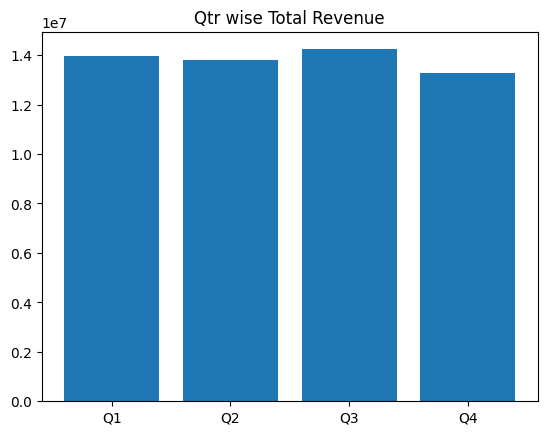

In [157]:
y=data.groupby(data["Qtr"],as_index=True)["Revenue"].sum()
x=y.index

plt.bar(x,y)
plt.title("Qtr wise Total Revenue")
plt.show()

Quarter 3 has the highest revenue, while Quarter 4 has the lowest revenue.

In [29]:
## Qtr Wise total transactions

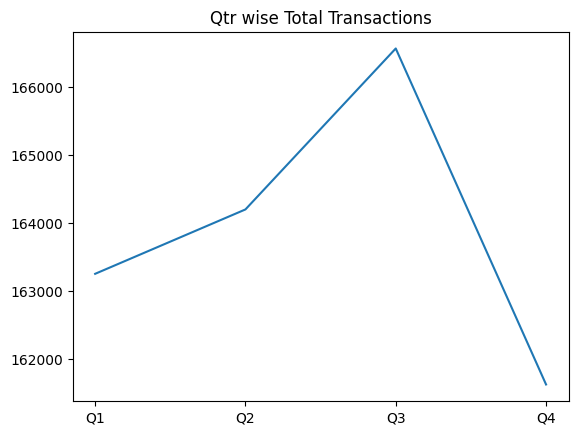

In [30]:
y=data.groupby("Qtr",as_index=True)["Total_Trans_Vol"].sum()
x=y.index

plt.plot(x,y)
plt.title("Qtr wise Total Transactions")
plt.show()

Transaction volumes show an upward trend from Q1 to Q3, followed by a significant decline in Q4.

In [124]:
## Week Wise transactions

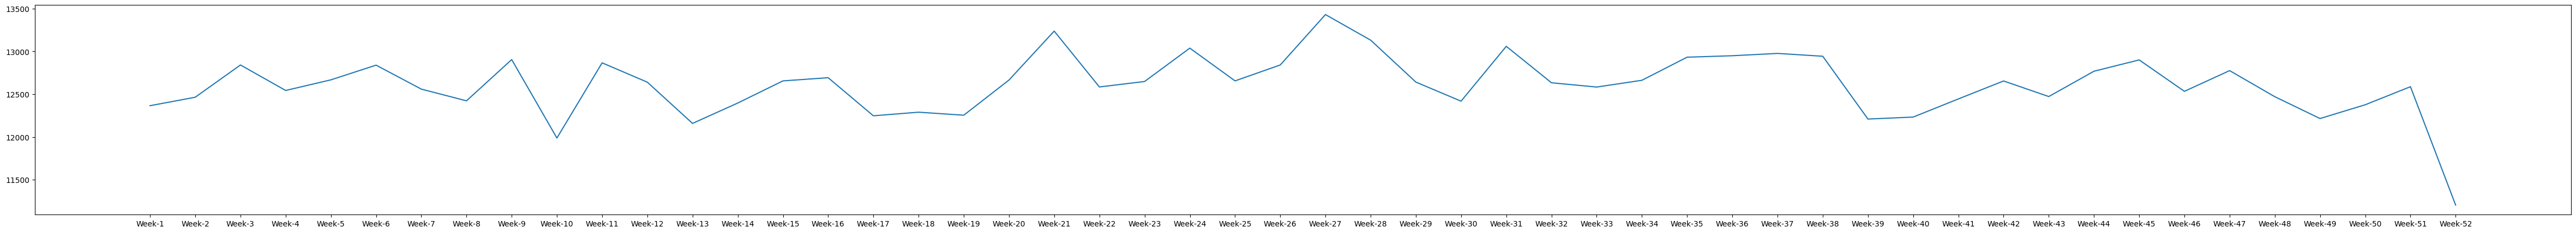

In [144]:
y=data.groupby("Week_Num",as_index=True)["Total_Trans_Vol"].sum().sort_index()
x=y.index

position=np.arange(1,53)
labels=list(data["Week"].unique())
plt.figure(figsize=(60,5))
plt.xticks(position,labels)
plt.plot(x,y)
plt.show()

In [71]:
## Revenue by Income group

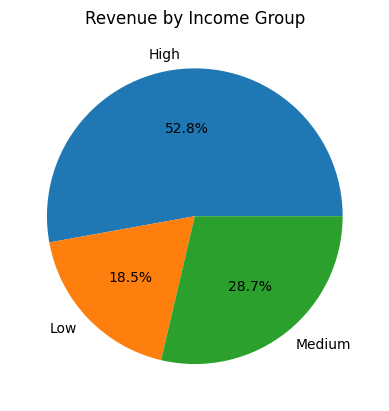

In [145]:
y=data.groupby("Income_Group",as_index=True)["Revenue"].sum()
x=y.index

plt.pie(y,labels=x,autopct="%1.1f%%")
plt.title("Revenue by Income Group")
plt.show()

The 'High' income group generated more revenue than the combined revenue of both the 'Low' and 'Medium' income groups.

In [31]:
## Revenue by expenditure type

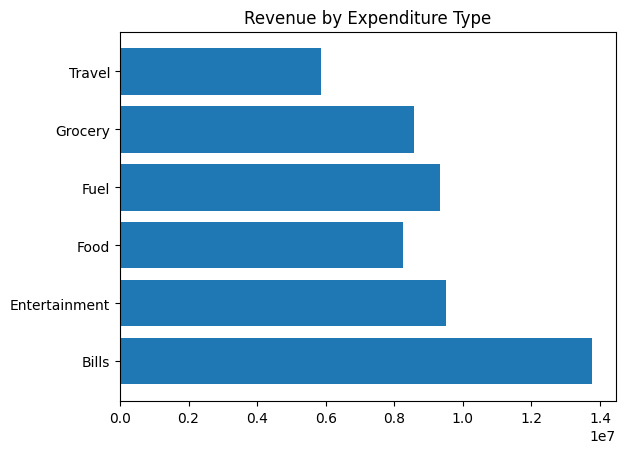

In [160]:
y=data.groupby("Exp Type")["Revenue"].sum()
x=y.index

plt.barh(x,y)
plt.title("Revenue by Expenditure Type")
plt.show()

The most revenue is generated by the 'Bills' expense type, while the least revenue is generated by 'Travel'.

In [33]:
## Card category wise Revenue

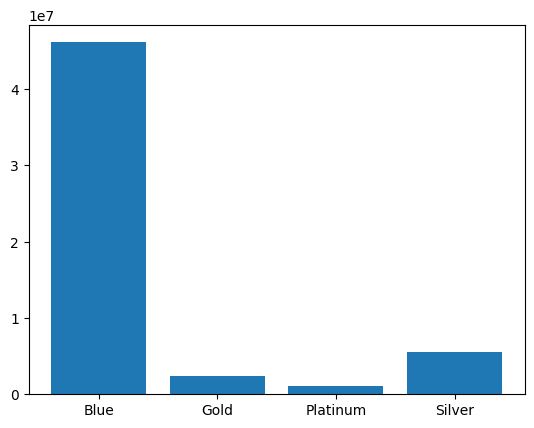

In [34]:
y=data.groupby("Card_Category",as_index=True)["Revenue"].sum()
x=y.index

plt.bar(x,y)
plt.show()

Most of the revenue is generated by the 'Blue' card type, while the minimum revenue is generated by the 'Platinum' card type

In [35]:
## Payment method wise Revenue

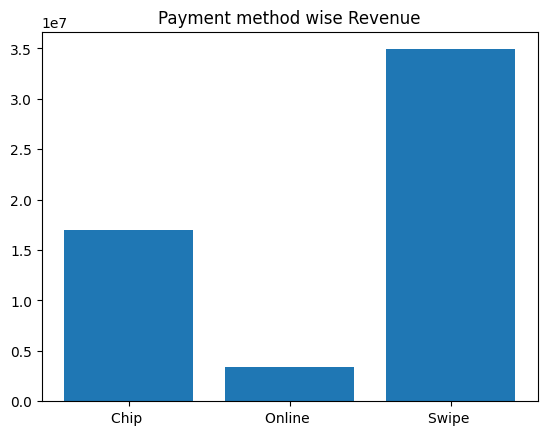

In [36]:
y=data.groupby("Use Chip")["Revenue"].sum()
x=y.index

plt.bar(x,y)
plt.title("Payment method wise Revenue")
plt.show()

Most of the revenue is generated by the 'Swipe' payment method, while the least is generated by 'Online'

# 

# Credit Card Customer Analysis

In [59]:
## Age group wise Total Transaction Amount

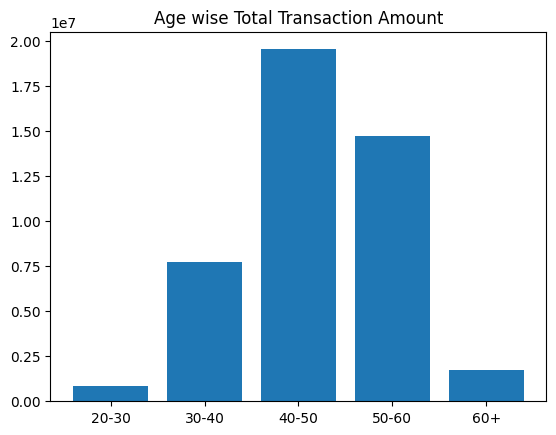

In [77]:
y=data.groupby("Age_Group",as_index=True)["Total_Trans_Amt"].sum()
x=y.index

plt.bar(x,y)
plt.title("Age wise Total Transaction Amount")
plt.show()

The age group '40-50' conducted the highest number of transactions, followed by the age groups '50-60' and '30-40'. The least transactions were conducted by the age group '20-30'.

In [61]:
## Gender Wise Revenue

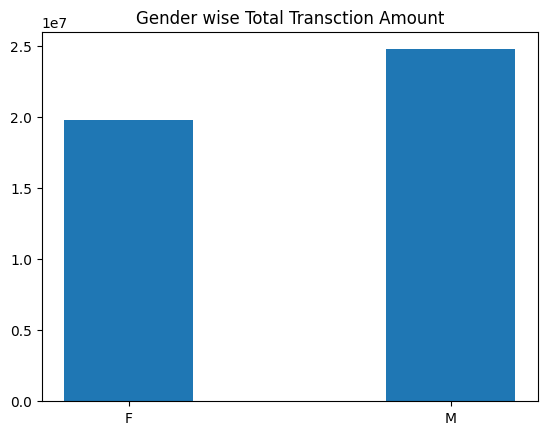

In [150]:
y=data.groupby("Gender",as_index=True)["Total_Trans_Amt"].sum()
x=y.index

plt.bar(x,y,width=0.4)
plt.title("Gender wise Total Transction Amount")
plt.show()

Males have conducted more transactions than females.

In [69]:
## Gender wise Total Transactions

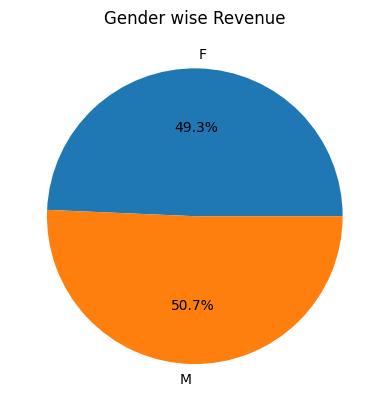

In [100]:
y=data.groupby("Gender",as_index=True)["Total_Trans_Vol"].sum()
x=y.index

plt.pie(y,labels=x,autopct="%1.1f%%")
plt.title("Gender wise Revenue")
plt.show()

Both males and females have done almost the same amount transactions.

In [79]:
##  Top 5 states by Revenue

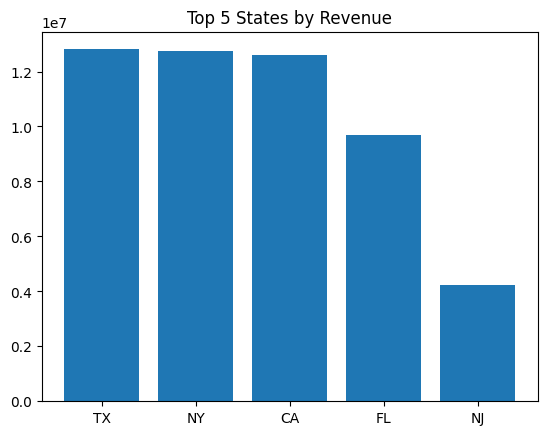

In [89]:
y=data.groupby("state_cd",as_index=True)["Revenue"].sum().sort_values(ascending=False).head()
x=y.index

plt.bar(x,y)
plt.title("Top 5 States by Revenue")
plt.show()

The top five states by revenue generation are Texas, New York, California, Florida, and New Jersey.

In [155]:
## Marital Status wise Total Transaction 

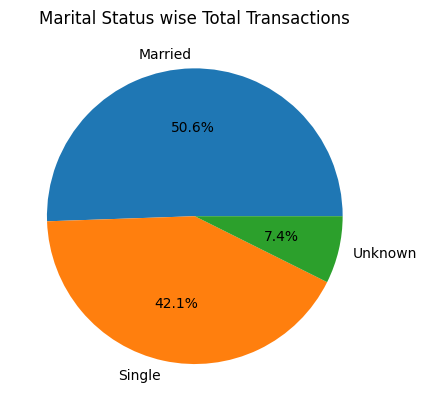

In [156]:
y=data.groupby("Marital_Status",as_index=True)["Total_Trans_Amt"].sum()
x=y.index

plt.pie(y,labels=x,autopct="%1.1f%%")
plt.title("Marital Status wise Total Transactions")
plt.show()

The most transactions are done by married people.